In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import pca



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reading the dataset
df =pd.read_csv('dataset.csv')
#checking the shape of the data
df.shape


(12330, 18)

In [ ]:
# Check Correlation between attributes  
data=df.corr()
# data['Administrative'].sort_values(ascending=False)
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(data,annot=True,square=True)

In [ ]:
# plt.figure(figsize=(5,5))
# sns.pairplot(df[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates']])

f,ax=plt.subplots(figsize=(8,8))
correlation=df[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates']].corr()
sns.heatmap(correlation,annot=True,square=True)

In [ ]:
# remove four attributes 
df_1=df.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration','ExitRates'],axis='columns')
df=df_1
df

In [6]:
df.shape


(12330, 14)

In [ ]:
#Revenue of data
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Revenue", data=df)
plt.xlabel('Revenue or not', fontsize = 15)
ax = sns.countplot(x="Revenue",hue='Revenue', data=df,)

In [ ]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Month", data=df,)
plt.xlabel('Months', fontsize = 15)
ax = sns.countplot(x="Month",hue='Month', data=df)

In [ ]:
df['Month'].value_counts()

In [ ]:
data = pd.crosstab(df['Month'], df['Revenue'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.title('Month vs Revenue', fontsize = 30)

plt.show()


In [ ]:
data = pd.crosstab(df['VisitorType'], df['Revenue'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5),color=['m','greenyellow'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

In [ ]:
df['VisitorType'].value_counts()

In [ ]:
data = pd.crosstab(df['TrafficType'], df['Revenue'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (11, 5),color=['peru','cyan'],)
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

In [ ]:
data = pd.crosstab(df['Region'], df['Revenue'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (11, 5),color=['lightslategray','lightpink'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

In [ ]:
# g = sns.catplot(x="Month", y="Revenue", data=df,kind="bar" )
# (g.set_axis_labels("", 'Revenue')
#   # .set_xticklabels(["Men", "Women", "Children"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True))  

In [ ]:
# shoping on weekend
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
# ax = sns.countplot(x="Weekend", data=df)
plt.xlabel('Diffrent Regions', fontsize = 15)
# ax = sns.countplot(x="Weekend", data=df, palette="Set2")
ax = sns.countplot(x="Region",hue="Region", data=df)

In [ ]:
df["Region"].value_counts()

In [17]:

df['Revenue'].replace({False:1,True:0},inplace=True);

df['Weekend'].replace({False:1,True:0},inplace=True);

In [18]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['VisitorType']= label_encoder.fit_transform(df['VisitorType']) 
df['Month']= label_encoder.fit_transform(df['Month']) 
  


In [19]:

cols_to_scale = ['ProductRelated','PageValues']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [20]:
df

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.001418,0.200000,0.000000,0.0,2,1,1,1,1,2,1,1
1,0,0,0.002837,0.000000,0.000000,0.0,2,2,2,1,2,2,1,1
2,0,0,0.001418,0.200000,0.000000,0.0,2,4,1,9,3,2,1,1
3,0,0,0.002837,0.050000,0.000000,0.0,2,3,2,2,4,2,1,1
4,0,0,0.014184,0.020000,0.000000,0.0,2,3,3,1,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,0.075177,0.007143,0.033839,0.0,1,4,6,1,1,2,0,1
12326,0,0,0.007092,0.000000,0.000000,0.0,7,3,2,1,8,2,0,1
12327,0,0,0.008511,0.083333,0.000000,0.0,7,3,2,1,13,2,0,1
12328,4,0,0.021277,0.000000,0.000000,0.0,7,2,2,3,11,2,1,1


In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

In [ ]:

plt.rcParams['figure.figsize'] = (12, 5)
size = [10551, 1694, 85]
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Types of Visitors', fontsize = 20)
# plt.axis('off')
plt.legend()

In [ ]:
df["VisitorType"].value_counts()

#presantation

# SMOTE

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [26]:
#define COnfusion matrix
def ConfusionMatrix(A,B):
  CM=confusion_matrix(A, B)
  fig, ax = plot_confusion_matrix(CM,show_absolute=True,show_normed=True,colorbar=True)
  plt.show()

In [27]:
x = df.drop('Revenue',axis='columns')
y = df['Revenue']

print(x.shape)
print(y.shape)

(12330, 13)
(12330,)


In [ ]:

# x.pred=['T','T','F','T','T','F','T','T','T','F','F','F','T','F','T','F','F','T','T','F']
# y.tar=['T','T','T','T','T','T','T','T','T','F','F','F','F','F','F','F','F','F','F','F']
# ConfusionMatrix(y.tar,x.pred)
# print(classification_report(y.tar, x.pred))


In [ ]:
# from imblearn.over_sampling as SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority');
x_smote, y_smote = smote.fit_sample(x,y);

print("Shape of x_smote :", x_smote.shape)
print("Shape of y_smote :", y_smote.shape)



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, stratify=y_smote,)


print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

print(x_smote.shape)
print(y_smote.shape)

#Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

Training Accuracy : 0.9210004477707414
Testing Accuracy : 0.9101899827288429
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2605
           1       0.91      0.90      0.91      2606

    accuracy                           0.91      5211
   macro avg       0.91      0.91      0.91      5211
weighted avg       0.91      0.91      0.91      5211



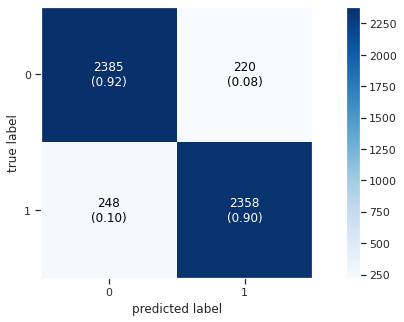

In [31]:
# create Decision tree classifier
DTC = DecisionTreeClassifier(min_samples_leaf=25,min_samples_split=5,random_state=50,)
DTC.fit(x_train, y_train)

#Predict the response for test dataset
y_pred=DTC.predict(x_test)

# evaluating the Training accuracy and Testing Acvuracy
print("Training Accuracy :", DTC.score(x_train, y_train))
print("Testing Accuracy :", DTC.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
ConfusionMatrix(y_test,y_pred)

In [40]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_leaf': [20,25,30,35,40],
    'min_samples_split': [5,10,15,20,25],
    'random_state':[50,75,100,125,150,200]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
# clf.cv_results_
model_data=pd.DataFrame(clf.cv_results_)
model_data[['param_min_samples_leaf','param_min_samples_split','param_random_state','mean_test_score']]

,param_min_samples_leaf,param_min_samples_split,param_random_state,mean_test_score
0,20,5,50,0.968144
1,20,5,75,0.968719
2,20,5,100,0.968719
3,20,5,125,0.968144
4,20,5,150,0.968719
...,...,...,...,...
145,40,25,75,0.966993
146,40,25,100,0.966993
147,40,25,125,0.966993
148,40,25,150,0.966993


In [34]:
#
print('the best score is : ',clf.best_score_)
print('The best fitted parameters for decision tree classifier is :',clf.best_params_)

the best score is :  0.9522170470166709
The best fitted parameters for decision tree classifier is : {'min_samples_leaf': 20, 'min_samples_split': 5, 'random_state': 50}


#RANDOME FOREST

Training Accuracy : 0.9142199194012666
Testing Accuracy : 0.9138361159086548
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2605
           1       0.93      0.90      0.91      2606

    accuracy                           0.91      5211
   macro avg       0.91      0.91      0.91      5211
weighted avg       0.91      0.91      0.91      5211



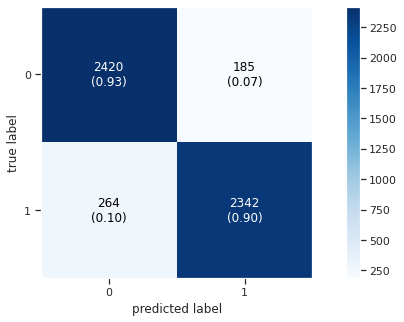

In [35]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

model = RandomForestClassifier(min_samples_leaf=20,min_samples_split=5,random_state=100)
model.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


# classification report
print(classification_report(y_test, y_pred))
# print(cr)


# confusion matrix
ConfusionMatrix(y_test,y_pred)

In [39]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=100), {
    'min_samples_leaf': [20,25,30,35,40,45,50,55,60],
    'min_samples_split': [5,10,15,20,25,30,35]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
# clf.cv_results_
model_data=pd.DataFrame(clf.cv_results_)
model_data[['param_min_samples_leaf','param_min_samples_split','mean_test_score']]

,param_min_samples_leaf,param_min_samples_split,mean_test_score
0,20,5,0.970447
1,20,10,0.970447
2,20,15,0.970447
3,20,20,0.970447
4,20,25,0.970447
...,...,...,...
58,60,15,0.956437
59,60,20,0.956437
60,60,25,0.956437
61,60,30,0.956437


In [41]:
print('the best score is : ',clf.best_score_)
print('The best fitted parameters for Random Forest classifier is :',clf.best_params_)

the best score is :  0.9687189802043786
The best fitted parameters for Random Forest classifier is : {'min_samples_leaf': 20, 'min_samples_split': 5, 'random_state': 75}


#Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy : 0.84679843919913
Testing Accuracy : 0.853195164075993
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      2605
           1       0.82      0.91      0.86      2606

    accuracy                           0.85      5211
   macro avg       0.86      0.85      0.85      5211
weighted avg       0.86      0.85      0.85      5211



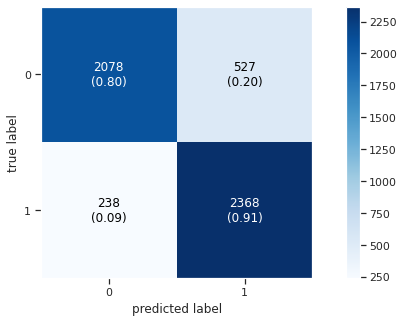

In [42]:

logreg=LogisticRegression(multi_class='multinomial',penalty='none',random_state=50,max_iter=250);
logreg.fit(x_train,y_train);

y_pred=logreg.predict(x_test);

# evaluating the model
print("Training Accuracy :" ,logreg.score(x_train, y_train))
print("Testing Accuracy :", logreg.score(x_test, y_test))


# classification report
print(classification_report(y_test, y_pred))


# confusion matrix
ConfusionMatrix(y_test,y_pred)

In [43]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(), {
  
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'random_state':[50,75,100,125,150,200],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'max_iter':[100,150,200,250,300]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
# clf.cv_results_
clf_result=pd.DataFrame(clf.cv_results_)
clf_result
clf_result[['param_penalty','param_multi_class','param_random_state','rank_test_score']]


Streaming output truncated to the last 5000 lines.
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

,param_penalty,param_multi_class,param_random_state,rank_test_score
0,l1,auto,50,360
1,l1,auto,75,239
2,l1,auto,100,238
3,l1,auto,125,237
4,l1,auto,150,236
...,...,...,...,...
355,none,multinomial,75,25
356,none,multinomial,100,25
357,none,multinomial,125,25
358,none,multinomial,150,25


In [44]:
print(clf.best_score_)
print(clf.best_params_)

0.9965463937446059
{'max_iter': 300, 'multi_class': 'auto', 'penalty': 'none', 'random_state': 50}


#SVM

Training Accuracy : 0.8505725068764792
Testing Accuracy : 0.8554979850316637
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2605
           1       0.82      0.91      0.86      2606

    accuracy                           0.86      5211
   macro avg       0.86      0.86      0.85      5211
weighted avg       0.86      0.86      0.85      5211



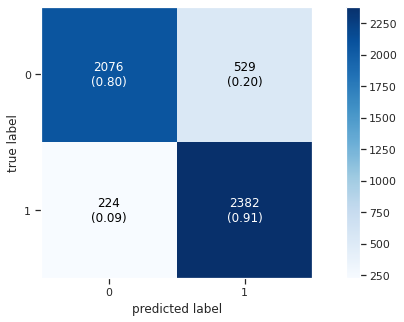

In [45]:
# from sklearn.svm import SVC
from sklearn import svm
# from sklearn.metrics import classification_report,confusion_matrix
model=svm.SVC(kernel='linear',C=20,gamma='auto',)
model.fit(x_train,y_train)

y_predict=model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# eveluate confusion matrix
print(classification_report(y_test,y_predict))

# confusion matrix
ConfusionMatrix(y_test,y_predict)

In [47]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear'],
    'cache_size':[25,50,75,100,200,300,400]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
clf.cv_results_
clf_result=pd.DataFrame(clf.cv_results_)
clf_result
# clf_result[['param_penalty','param_multi_class','param_random_state','rank_test_score']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_cache_size,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.824337,0.025615,0.121969,0.001399,1,25,rbf,"{'C': 1, 'cache_size': 25, 'kernel': 'rbf'}",0.698945,0.703455,0.731286,0.702495,0.713052,0.709847,0.011693,36
1,1.088879,0.049981,0.026538,0.001054,1,25,linear,"{'C': 1, 'cache_size': 25, 'kernel': 'linear'}",0.936721,0.963532,0.953935,0.949136,0.942418,0.949148,0.009268,15
2,0.819340,0.008783,0.121433,0.002821,1,50,rbf,"{'C': 1, 'cache_size': 50, 'kernel': 'rbf'}",0.698945,0.703455,0.731286,0.702495,0.713052,0.709847,0.011693,36
3,1.137803,0.059839,0.026196,0.000518,1,50,linear,"{'C': 1, 'cache_size': 50, 'kernel': 'linear'}",0.936721,0.963532,0.953935,0.949136,0.942418,0.949148,0.009268,15
4,0.822248,0.011122,0.120298,0.000504,1,75,rbf,"{'C': 1, 'cache_size': 75, 'kernel': 'rbf'}",0.698945,0.703455,0.731286,0.702495,0.713052,0.709847,0.011693,36
5,1.139252,0.062264,0.025974,0.000274,1,75,linear,"{'C': 1, 'cache_size': 75, 'kernel': 'linear'}",0.936721,0.963532,0.953935,0.949136,0.942418,0.949148,0.009268,15
6,0.818143,0.006107,0.121641,0.002594,1,100,rbf,"{'C': 1, 'cache_size': 100, 'kernel': 'rbf'}",0.698945,0.703455,0.731286,0.702495,0.713052,0.709847,0.011693,36
7,1.138113,0.058864,0.027098,0.001766,1,100,linear,"{'C': 1, 'cache_size': 100, 'kernel': 'linear'}",0.936721,0.963532,0.953935,0.949136,0.942418,0.949148,0.009268,15
8,0.825491,0.011228,0.120467,0.000620,1,200,rbf,"{'C': 1, 'cache_size': 200, 'kernel': 'rbf'}",0.698945,0.703455,0.731286,0.702495,0.713052,0.709847,0.011693,36
9,1.139140,0.060722,0.026000,0.000171,1,200,linear,"{'C': 1, 'cache_size': 200, 'kernel': 'linear'}",0.936721,0.963532,0.953935,0.949136,0.942418,0.949148,0.009268,15


In [ ]:
gird_svm_data=pd.DataFrame(clf.cv_results_)
gird_svm_data

In [ ]:
gird_svm_data[['param_C','param_kernel','mean_test_score']]

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

# K-NN

Training Accuracy : 0.8666895133653187
Testing Accuracy : 0.7956507834985609
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      3127
           1       0.90      0.67      0.77      3127

    accuracy                           0.80      6254
   macro avg       0.82      0.80      0.79      6254
weighted avg       0.82      0.80      0.79      6254



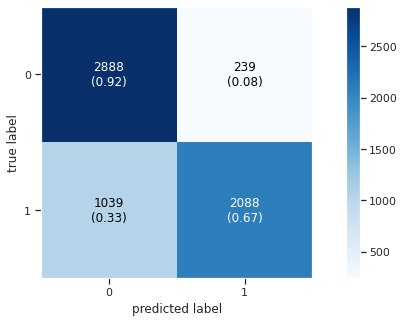

In [ ]:


#Create KNN Classifier

knn = KNeighborsClassifier(n_neighbors=5,)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

# evaluating the model
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_test, y_test))

confusion_matrix(y_test,y_pred)

# eveluate confusion matrix
print(classification_report(y_test,y_pred))


# confusion matrix
ConfusionMatrix(y_test,y_pred)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,15,20,25],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'min_samples_leaf': [20,25,30,35,40,45,50,55,60],
            'min_samples_split': [5,10,15,20,25,30,35],
            'random_state':[100,200,300]

        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,15,20]
        }
    },
    'Decision Tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'min_samples_leaf': [20,25,30,35,40,45,50,55,60],
            'min_samples_split': [5,10,15,20,25,30,35],
            'random_state':[100,200,300]
        }
    }
    
}

In [ ]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_test,y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

# cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score_1=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5)
np.average(score_1)
score_1=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=20)
np.average(score_1)